1/1 [==============================] - 1s 1s/step


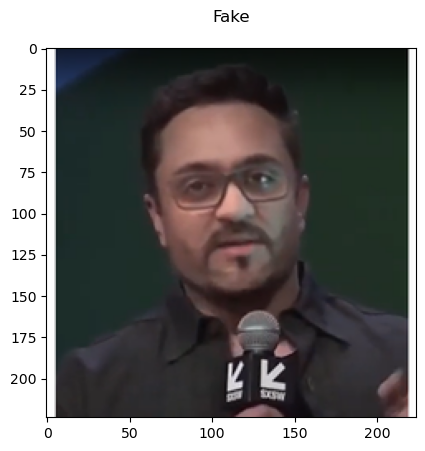

Class: Fake
Confidence score: 1.0
1/1 [==============================] - 0s 30ms/step


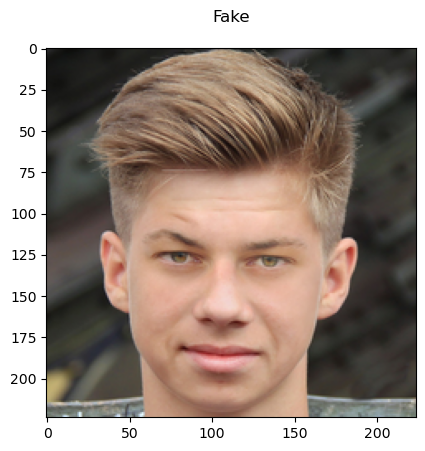

Class: Fake
Confidence score: 0.9999999
1/1 [==============================] - 0s 37ms/step


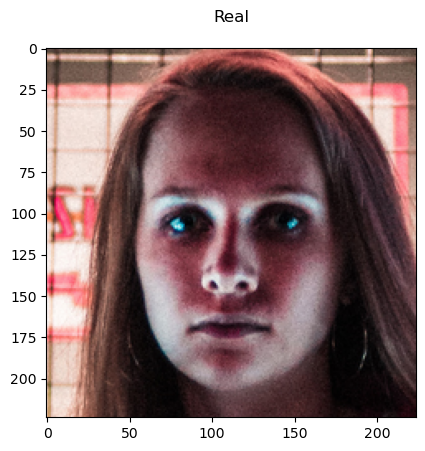

Class: Real
Confidence score: 1.0
1/1 [==============================] - 0s 39ms/step


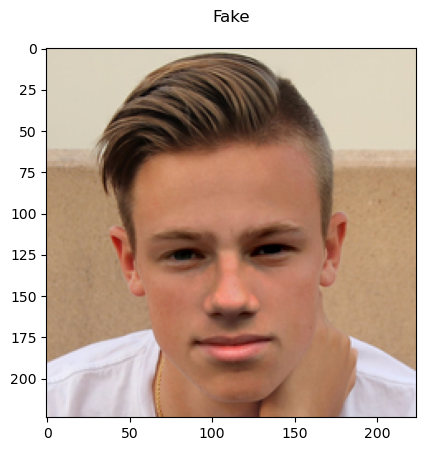

Class: Fake
Confidence score: 0.9992748
1/1 [==============================] - 0s 34ms/step


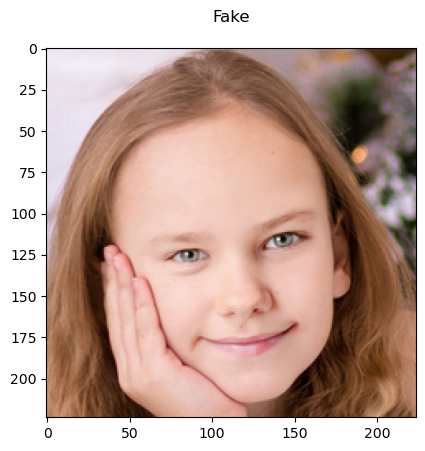

Class: Fake
Confidence score: 0.99997294
1/1 [==============================] - 0s 30ms/step


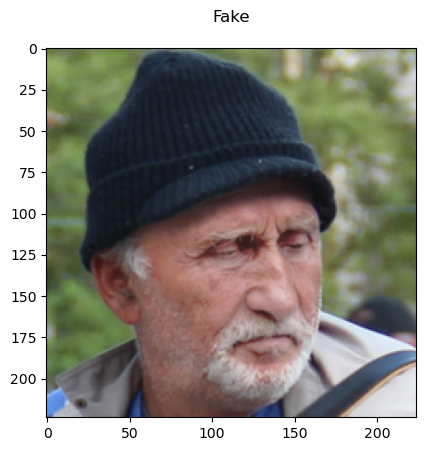

Class: Fake
Confidence score: 1.0
1/1 [==============================] - 0s 47ms/step


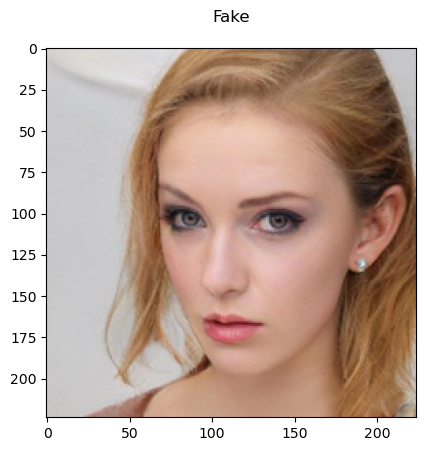

Class: Fake
Confidence score: 1.0
1/1 [==============================] - 0s 41ms/step


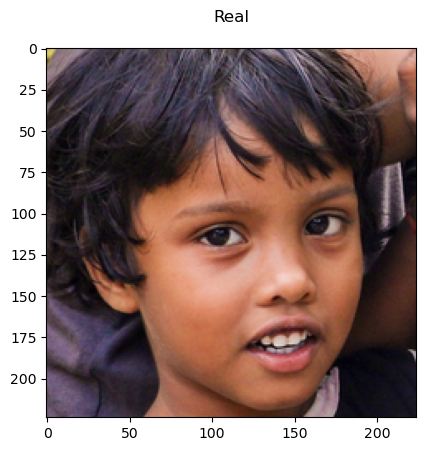

Class: Real
Confidence score: 0.9999578
1/1 [==============================] - 0s 49ms/step


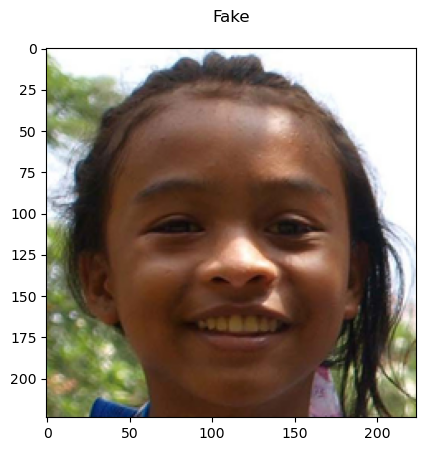

Class: Fake
Confidence score: 0.99998975
1/1 [==============================] - 0s 32ms/step


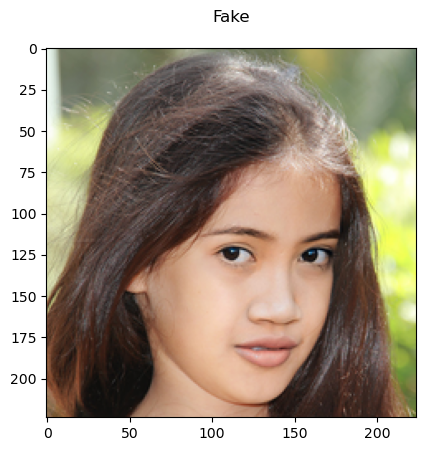

Class: Fake
Confidence score: 0.98817784
1/1 [==============================] - 0s 33ms/step


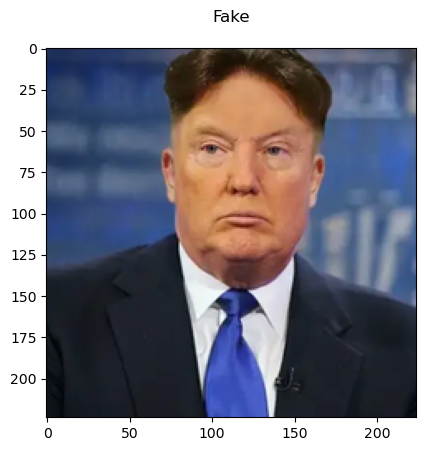

Class: Fake
Confidence score: 0.8383488
1/1 [==============================] - 0s 50ms/step


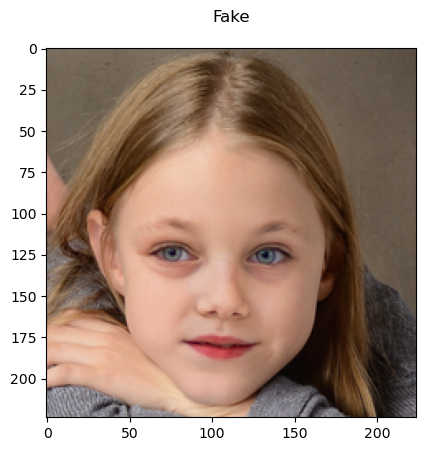

Class: Fake
Confidence score: 0.999995
1/1 [==============================] - 0s 43ms/step


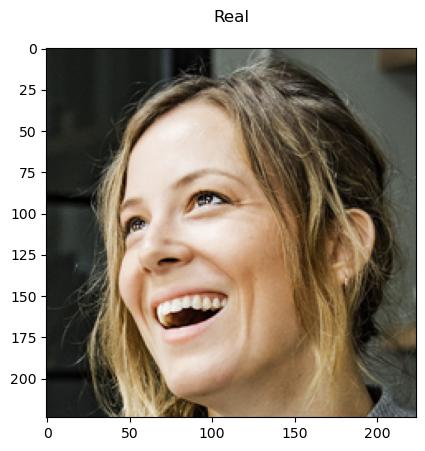

Class: Real
Confidence score: 0.9999256
1/1 [==============================] - 0s 33ms/step


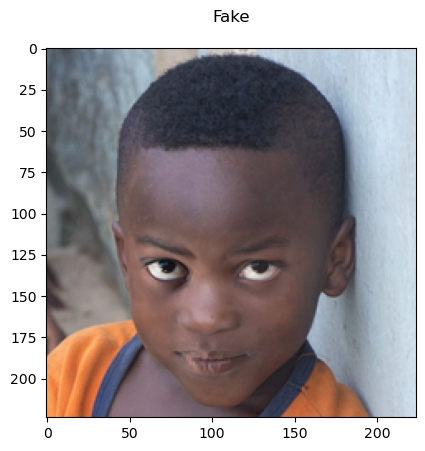

Class: Fake
Confidence score: 1.0
1/1 [==============================] - 0s 42ms/step


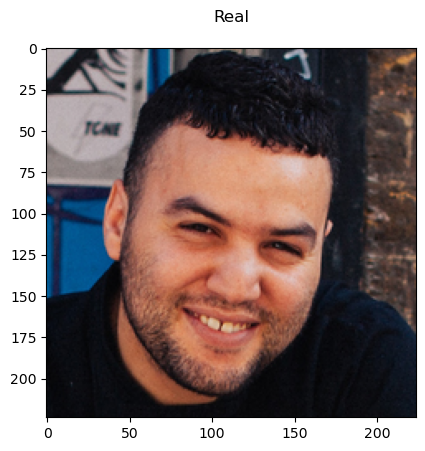

Class: Real
Confidence score: 1.0
1/1 [==============================] - 0s 49ms/step


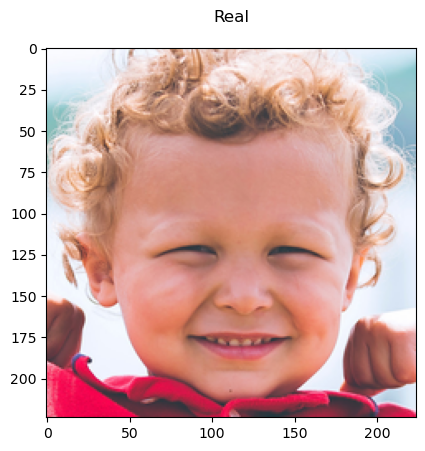

Class: Real
Confidence score: 1.0
1/1 [==============================] - 0s 42ms/step


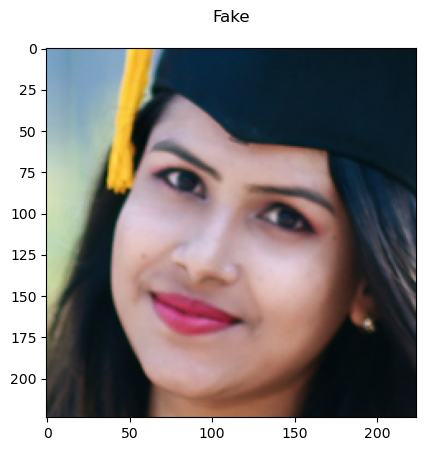

Class: Fake
Confidence score: 0.99999917
1/1 [==============================] - 0s 45ms/step


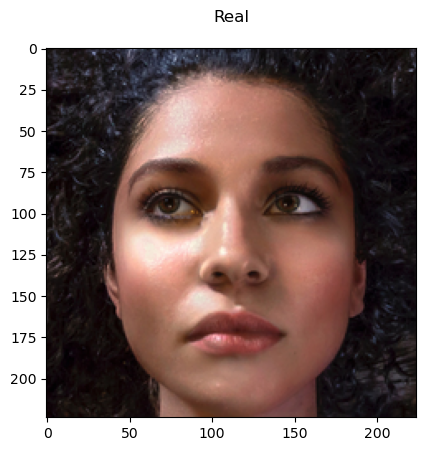

Class: Real
Confidence score: 1.0
1/1 [==============================] - 0s 40ms/step


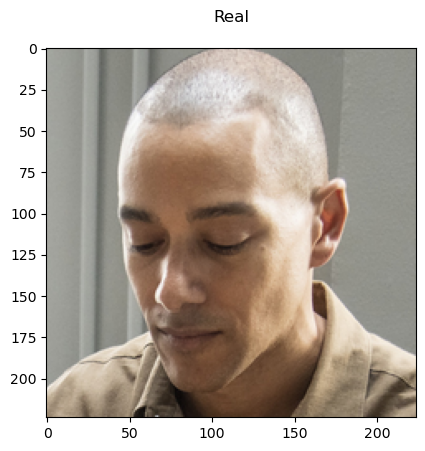

Class: Real
Confidence score: 1.0
1/1 [==============================] - 0s 40ms/step


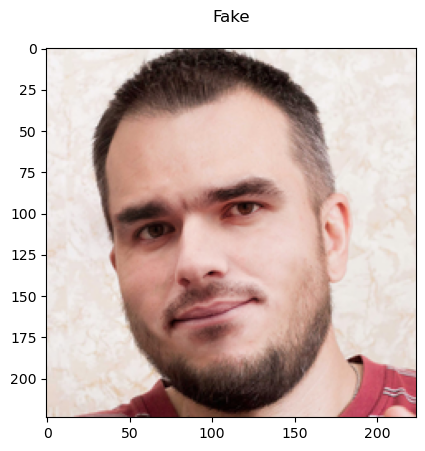

Class: Fake
Confidence score: 0.99999714
1/1 [==============================] - 0s 37ms/step


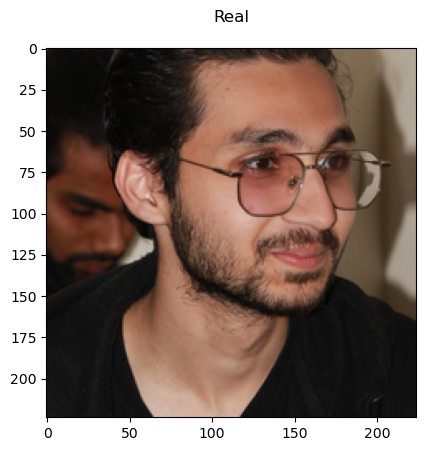

Class: Real
Confidence score: 0.9999976


FileNotFoundError: [Errno 2] No such file or directory: 'Downloads\\dataset\\22.jpg'

In [1]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

# Load the model
model = load_model('deepfakemodel.h5', compile=False)

# Load the labels
class_names = open('labels.txt', 'r').readlines()

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
for i in range(1,23):
    image = Image.open(f"Downloads\\dataset\\{i}.jpg").convert('RGB')

    #resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    #turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # predict
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    plt.imshow(image)
    plt.title(class_name)
    plt.show()
    
    confidence_score = prediction[0][index]

    print('Class:', class_name, end='')
    print('Confidence score:', confidence_score)